In [85]:
import pandas as pd
import numpy as np
import os
import collections
import matplotlib.pyplot as plt

# ROOTDIR is where I have my thesis folder on my computer
ROOTDIR = "/home/dongwuxing/Documents/thesis"
DATADIR = ROOTDIR + "/dataset"
PBDBDIR = DATADIR + "/pbdb"
PLOTDIR = ROOTDIR + "/report/figures/result/"

In [6]:
data = pd.read_csv(os.path.join(PBDBDIR,"pbdb_parsed_processed.csv"))
tree = pd.read_csv(os.path.join(PBDBDIR,"tree.csv"))

In [ ]:
# middle_ma is the middle value between maxma and minma for each fossil
data["middle_ma"] = (data["max_ma"] + data["min_ma"])/2
# span is the difference between maxma and minma for each fossil
data["span"] = data["max_ma"] - data["min_ma"]

In [12]:
# totoal number of fossils, animal fossils and plant fossils
print(data.shape[0],data[data["kingdom"]=="Animalia"].shape[0],data[data["kingdom"]=="Plantae"].shape[0],data[data["kingdom"]=="Plantae"].shape[0]/data.shape[0])

1346120 1240202 105918 0.07868392119573292


In [166]:
# most popular animal and plant phylums
counts_animal_phylum = pd.DataFrame(data[data["kingdom"]=="Animalia"]["phylum"].value_counts())
counts_animal_phylum.reset_index(inplace=True)
counts_animal_phylum = counts_animal_phylum.rename(columns={'index': 'phylum', 'phylum': 'count'})
counts_plant_phylum = pd.DataFrame(data[data["kingdom"]=="Plantae"]["phylum"].value_counts())
counts_plant_phylum.reset_index(inplace=True)
counts_plant_phylum = counts_plant_phylum.rename(columns={'index': 'phylum', 'phylum': 'count'})

In [65]:
# most popular animal and plant species
counts_animal_species = pd.DataFrame(data[(data["kingdom"]=="Animalia") & (data["rank"]=="species")]["path_from_root"].value_counts())
counts_plant_species = pd.DataFrame(data[(data["kingdom"]=="Plantae") & (data["rank"]=="species")]["path_from_root"].value_counts())

In [286]:
counts_plant_phylum[:5]

,phylum,count
0,Spermatophyta,24029
1,Pteridophyta,20905
2,Coniferophyta,7133
3,Rhodophyta,5607
4,Angiospermae,5130


In [168]:
counts_animal_phylum[:5]

,phylum,count
0,Mollusca,471115
1,Chordata,271340
2,Brachiopoda,179683
3,Arthropoda,147171
4,Cnidaria,66575


In [ ]:
plt.bar(animal_name_desc[:10],animal_value_desc[:10])
plt.title("Top 10 mostly identified animals")
plt.xticks(rotation=45,ha="right")
plt.ylabel("amount")

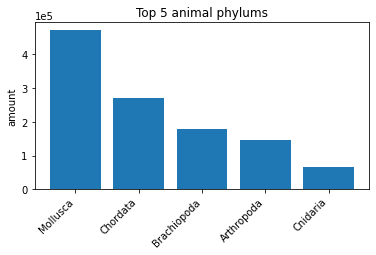

In [282]:
# plot top animal phylums 
fig, axs = plt.subplots(figsize=(6,4))
fig.subplots_adjust(bottom=0.3)
plt.bar(counts_animal_phylum["phylum"][:5],counts_animal_phylum["count"][:5])
axs.ticklabel_format(axis='y',style="sci",scilimits=(5,5)) 
plt.title("Top 5 animal phylums")
plt.xticks(rotation=45,ha="right")
plt.ylabel("amount")
plt.savefig(PLOTDIR + "animal_phylums.png")

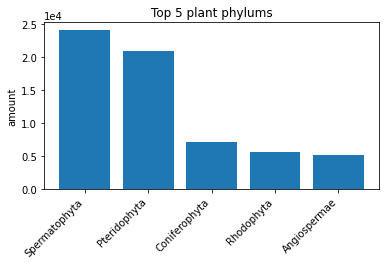

In [281]:
# plot top plant phylums 
fig, axs = plt.subplots(figsize=(6,4))
fig.subplots_adjust(bottom=0.3)
plt.bar(counts_plant_phylum["phylum"][:5],counts_plant_phylum["count"][:5])
axs.ticklabel_format(axis='y',style="sci",scilimits=(4,4)) 
plt.title("Top 5 plant phylums")
plt.xticks(rotation=45,ha="right")
plt.ylabel("amount")
plt.savefig(PLOTDIR + "plant_phylums.png")

In [178]:
# most popular nodes
nodes_fossil_rank = pd.DataFrame(data["path_from_root"].value_counts())
nodes_fossil_rank.reset_index(inplace=True)
nodes_fossil_rank = nodes_fossil_rank.rename(columns={"index":"path_from_root","path_from_root":"counts"})

In [206]:
top_nodes = nodes_fossil_rank[:5]
top_nodes ["name"] = [tree[tree["pathFromRoot"]==i].iloc[0]["name"] for i in top_nodes["path_from_root"]]
top_nodes ["rank"] = [tree[tree["pathFromRoot"]==i].iloc[0]["rank"] for i in top_nodes["path_from_root"]]
top_nodes ["name_and_rank"] = top_nodes["name"] + "(" + top_nodes["rank"] + ")"

/tmp/ipykernel_450980/2577073343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_nodes ["name"] = [tree[tree["pathFromRoot"]==i].iloc[0]["name"] for i in top_nodes["path_from_root"]]
/tmp/ipykernel_450980/2577073343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_nodes ["rank"] = [tree[tree["pathFromRoot"]==i].iloc[0]["rank"] for i in top_nodes["path_from_root"]]
/tmp/ipykernel_450980/2577073343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

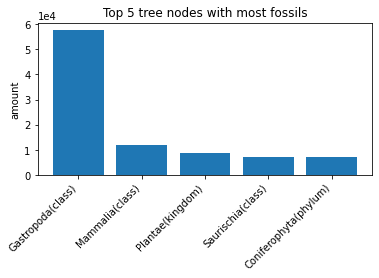

In [285]:
# plot nodes with most fossils
fig, axs = plt.subplots(figsize=(6,4))
fig.subplots_adjust(bottom=0.35)
plt.bar(top_nodes["name_and_rank"][:5],top_nodes["counts"][:5])
axs.ticklabel_format(axis='y',style="sci",scilimits=(4,4)) 
plt.title("Top 5 tree nodes with most fossils")
plt.xticks(rotation=45,ha="right")
plt.ylabel("amount")
plt.savefig(PLOTDIR + "top_nodes.png")

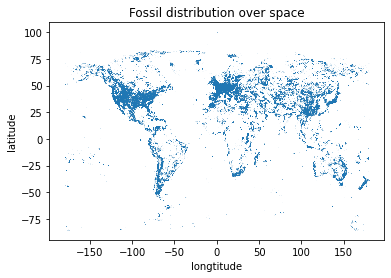

In [161]:
# plot fossil distribution over space
fig, axs = plt.subplots(figsize=(6,4))
plt.scatter(data["lng"],data["lat"], s=0.00012)
plt.title("Fossil distribution over space")
plt.xlabel("longtitude")
plt.ylabel("latitude")
plt.savefig(PLOTDIR + "space_distribution.png")

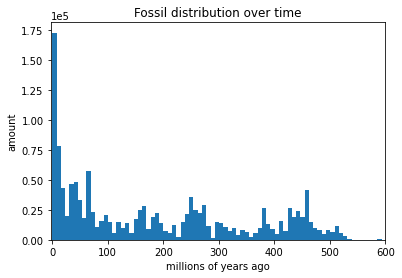

In [121]:
# plot fossil distribution over time
fig, axs = plt.subplots(figsize=(6,4))
plt.xlim(-3,600)
data["middle_ma"].hist(bins=100)
axs.grid(False)
axs.ticklabel_format(axis='y',style="sci",scilimits=(5,5)) 
plt.title("Fossil distribution over time")
plt.xlabel("millions of years ago")
plt.ylabel("amount")
plt.savefig(PLOTDIR + "time_distribution.png")

In [51]:
# average and sd of span
print(data["span"].mean(), data["span"].std())

6.799983463138497 7.585719855649793


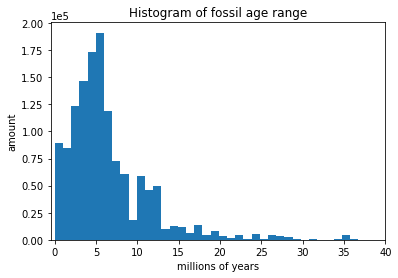

In [211]:
# plot fossil age range histogram
fig, axs = plt.subplots(figsize=(6,4))
plt.xlim(-0.5,600)
data[data["span"]<40]["span"].hist(bins=40)
plt.xlim(-0.5,40)
axs.grid(False)
axs.ticklabel_format(axis='y',style="sci",scilimits=(5,5)) 
plt.title("Histogram of fossil age range")
plt.xlabel("millions of years")
plt.ylabel("amount")
plt.savefig(PLOTDIR + "age_range.png")


In [108]:
# minimal age range and amount
print(data["span"].min(), data[data["span"]==data["span"].min()].shape[0])

0.0 444


In [109]:
# maximal age range and amount
print(data["span"].max(), data[data["span"]==data["span"].max()].shape[0])

475.0 1


In [110]:
# find which fossil it is
data[data["span"]==475]

,occurrence_no,accepted_name,accepted_rank,kingdom,phylum,class,order,family,genus,max_ma,min_ma,lng,lat,index,path_from_root,rank,middle_ma,span
184809,960039,Rugosa,subclass,Animalia,Cnidaria,Anthozoa,NaN,NaN,NaN,541.0,66.0,-131.358002,55.080002,109092,"Eukaryota,Animalia,Cnidaria,Anthozoa",class,303.5,475.0


In [ ]:
# rank distribution of fossils
# loss of detail for the fossils

In [ ]:
# breakdown of most popular phylums 
# number of nodes with no fossils attached 
# number of nodes with repetitive names 
# nodes with the most amount of fossils attached

In [125]:
# number of nodes on each layer
print(tree[tree["rank"]=="domain"].shape[0],tree[tree["rank"]=="kingdom"].shape[0],tree[tree["rank"]=="phylum"].shape[0],tree[tree["rank"]=="class"].shape[0],tree[tree["rank"]=="order"].shape[0],tree[tree["rank"]=="family"].shape[0],tree[tree["rank"]=="genus"].shape[0],tree[tree["rank"]=="species"].shape[0],tree[tree["rank"]=="subspecies"].shape[0])

1 2 60 159 1061 7305 47828 119701 252


In [126]:
# number of all nodes and nodes with fossils
print(tree.shape[0], len(data["path_from_root"].unique()))

176369 147315


In [ ]:
data[data["accepted_rank"]=="species" & ]

In [131]:
ranks = ["domain","kingdom","phylum","class","order","family","genus","species","subspecies"]

In [132]:
data[data["accepted_rank"]=="subspecies"].shape

(1361, 18)

In [134]:
# number of fossils not in standard ranks
data[~data["accepted_rank"].isin(ranks)].shape

(53579, 18)

In [136]:
# all the accepted ranks
data["accepted_rank"].unique().tolist()

['genus',
 'species',
 'phylum',
 'family',
 'subclass',
 'kingdom',
 'class',
 'order',
 'subgenus',
 'superphylum',
 'unranked clade',
 'subphylum',
 'subfamily',
 'tribe',
 'subkingdom',
 'superfamily',
 'superorder',
 'subspecies',
 'suborder',
 'superclass',
 'infraclass',
 'infraorder',
 'subtribe',
 'informal']

In [135]:
# number of animal and plant fossils losing rank information 
print(data[(data["accepted_rank"]!=data["rank"])&(data["kingdom"]=="Animalia")].shape,data[(data["accepted_rank"]!=data["rank"])&(data["kingdom"]=="Plantae")].shape)

(209257, 18) (58874, 18)


In [153]:
# and number of fossils on each layer that doesn't belong there before
animal_dislocation, plant_dislocation = pd.DataFrame({"rank":ranks}),pd.DataFrame({"rank":ranks})
animal_dislocation["counts"] = [data[(data["kingdom"]=="Animalia")&(data["accepted_rank"]!=data["rank"])&(data["rank"]==rank)].shape[0] for rank in ranks]
animal_dislocation["percentage"] = animal_dislocation["counts"]/data[(data["accepted_rank"]!=data["rank"])&(data["kingdom"]=="Animalia")].shape[0]*100
plant_dislocation["counts"] = [data[(data["kingdom"]=="Plantae")&(data["accepted_rank"]!=data["rank"])&(data["rank"]==rank)].shape[0] for rank in ranks]
plant_dislocation["percentage"] = plant_dislocation["counts"]/data[(data["accepted_rank"]!=data["rank"])&(data["kingdom"]=="Plantae")].shape[0]*100

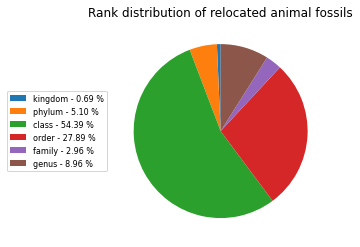

In [272]:
# plot the percentage of the relocated animal fossils

values = animal_dislocation[animal_dislocation["counts"]>0]["counts"]
labels = animal_dislocation[animal_dislocation["counts"]>0]["rank"]
percentages = animal_dislocation[animal_dislocation["counts"]>0]["percentage"]
legend_labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percentages)]
patches, texts = plt.pie(values, startangle=90)
plt.title("Rank distribution of relocated animal fossils")
plt.legend(patches, legend_labels, loc='center left', bbox_to_anchor=(-0.5, 0.5),
           fontsize=8)
plt.savefig(PLOTDIR + "animal_relocate.png")


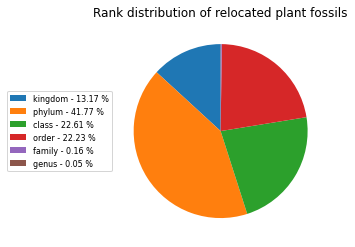

In [271]:
# plot the percentage of the relocated plant fossils

values = plant_dislocation[plant_dislocation["counts"]>0]["counts"]
labels = plant_dislocation[plant_dislocation["counts"]>0]["rank"]
percentages = plant_dislocation[plant_dislocation["counts"]>0]["percentage"]
legend_labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percentages)]
patches, texts = plt.pie(values, startangle=90)
plt.title("Rank distribution of relocated plant fossils")
plt.legend(patches, legend_labels, loc='center left', bbox_to_anchor=(-0.5, 0.5),
           fontsize=8)
plt.savefig(PLOTDIR + "plant_relocate.png")

In [273]:
# the oldest fossils
data[data["max_ma"]==data["max_ma"].max()]

,occurrence_no,accepted_name,accepted_rank,kingdom,phylum,class,order,family,genus,max_ma,min_ma,lng,lat,index,path_from_root,rank,middle_ma,span
150847,879665,Porifera,phylum,Animalia,Porifera,NaN,NaN,NaN,NaN,1000.0,541.0,107.406113,27.145832,107870,"Eukaryota,Animalia,Porifera",phylum,770.5,459.0
150848,879668,Porifera,phylum,Animalia,Porifera,NaN,NaN,NaN,NaN,1000.0,541.0,107.406113,27.145832,107870,"Eukaryota,Animalia,Porifera",phylum,770.5,459.0
391540,879673,Animalia,kingdom,Animalia,NaN,NaN,NaN,NaN,NaN,1000.0,541.0,138.573883,-31.558889,132185,"Eukaryota,Animalia",kingdom,770.5,459.0
391541,879787,Animalia,kingdom,Animalia,NaN,NaN,NaN,NaN,NaN,1000.0,541.0,138.000000,-31.000000,132185,"Eukaryota,Animalia",kingdom,770.5,459.0
514970,879664,Cnidaria,phylum,Animalia,Cnidaria,NaN,NaN,NaN,NaN,1000.0,541.0,107.406113,27.145832,183715,"Eukaryota,Animalia,Cnidaria",phylum,770.5,459.0
514971,879667,Cnidaria,phylum,Animalia,Cnidaria,NaN,NaN,NaN,NaN,1000.0,541.0,107.406113,27.145832,183715,"Eukaryota,Animalia,Cnidaria",phylum,770.5,459.0
528059,129642,Nimbia,genus,Animalia,Problematica,NaN,NaN,NaN,Nimbia,1000.0,541.0,-4.250000,26.000000,194549,"Eukaryota,Animalia,Problematica",phylum,770.5,459.0
537506,1157799,Bavlinella,genus,Animalia,Problematica,NaN,NaN,NaN,Bavlinella,1000.0,541.0,18.333332,78.949997,200529,"Eukaryota,Animalia,Problematica",phylum,770.5,459.0
537507,1157804,Bavlinella,genus,Animalia,Problematica,NaN,NaN,NaN,Bavlinella,1000.0,541.0,17.500000,79.183334,200529,"Eukaryota,Animalia,Problematica",phylum,770.5,459.0
537508,1157807,Bavlinella,genus,Animalia,Problematica,NaN,NaN,NaN,Bavlinella,1000.0,541.0,17.866667,78.816666,200529,"Eukaryota,Animalia,Problematica",phylum,770.5,459.0


In [277]:
# proportion of fossils in the recent time
data[data["middle_ma"]<160].shape[0]/data.shape[0]

0.508460612723977

In [278]:
# number of fossils having a precise time
data[data["max_ma"]==data["min_ma"]]

,occurrence_no,accepted_name,accepted_rank,kingdom,phylum,class,order,family,genus,max_ma,min_ma,lng,lat,index,path_from_root,rank,middle_ma,span
2164,1195550,Lepidodendron,genus,Plantae,NaN,NaN,NaN,Lepidodendraceae,Lepidodendron,314.6,314.6,3.561667,50.405277,141,"Eukaryota,Plantae",kingdom,314.6,0.0
7990,1210067,Pteridophyta,phylum,Plantae,Pteridophyta,NaN,NaN,NaN,NaN,314.6,314.6,7.135500,51.667999,622,"Eukaryota,Plantae,Pteridophyta",phylum,314.6,0.0
9359,602301,Granulatisporites,genus,Plantae,Pteridophyta,Pteridopsida,NaN,NaN,Granulatisporites,314.6,314.6,-86.650002,38.560001,686,"Eukaryota,Plantae,Pteridophyta,Pteridopsida",class,314.6,0.0
9360,602302,Granulatisporites,genus,Plantae,Pteridophyta,Pteridopsida,NaN,NaN,Granulatisporites,314.6,314.6,-86.650002,38.560001,686,"Eukaryota,Plantae,Pteridophyta,Pteridopsida",class,314.6,0.0
9594,602303,Cyclogranisporites,genus,Plantae,NaN,NaN,NaN,NaN,Cyclogranisporites,314.6,314.6,-86.650002,38.560001,687,"Eukaryota,Plantae",kingdom,314.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341338,1540045,Belinurus concinnus,species,Animalia,Arthropoda,Xiphosura,Xiphosurida,Belinuridae,Belinurus,314.6,314.6,-3.760000,51.770000,1328328,"Eukaryota,Animalia,Arthropoda,Xiphosura,Xiphos...",species,314.6,0.0
1341339,1540046,Belinurus carwayensis,species,Animalia,Arthropoda,Xiphosura,Xiphosurida,Belinuridae,Belinurus,314.6,314.6,-4.230000,51.740002,1328329,"Eukaryota,Animalia,Arthropoda,Xiphosura,Xiphos...",species,314.6,0.0
1341340,1540048,Belinurus pustulosus,species,Animalia,Arthropoda,Xiphosura,Xiphosurida,Belinuridae,Belinurus,314.6,314.6,-4.230000,51.740002,1328331,"Eukaryota,Animalia,Arthropoda,Xiphosura,Xiphos...",species,314.6,0.0
1341343,1540557,Prestwichianella anthrax,species,Animalia,Arthropoda,Xiphosura,Xiphosurida,Belinuridae,Prestwichianella,314.6,314.6,-2.492000,52.639000,1328352,"Eukaryota,Animalia,Arthropoda,Xiphosura,Xiphos...",species,314.6,0.0
